### Simple Data Wrangling Using UN Data to Show Correlation Between Civil War and Malnutrition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('UNdata_Export.csv')

In [3]:
df.drop(df.index[5600:], inplace = True)

In [4]:
df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2015,26.8,1
1,Afghanistan,2014,26.0,2
2,Afghanistan,2013,25.1,3
3,Afghanistan,2012,24.4,4
4,Afghanistan,2011,24.3,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5600 entries, 0 to 5599
Data columns (total 4 columns):
Country or Area    5600 non-null object
Year               5600 non-null object
Value              4262 non-null float64
Value Footnotes    5600 non-null object
dtypes: float64(1), object(3)
memory usage: 218.8+ KB


In [6]:
df.describe()

,Value
count,4262.000000
mean,14.703355
std,13.517863
min,5.000000
25%,5.000000
50%,6.600000
75%,22.100000
max,80.800000


'\ndata is skewed, most countries have low levels of undernourishment. \n'

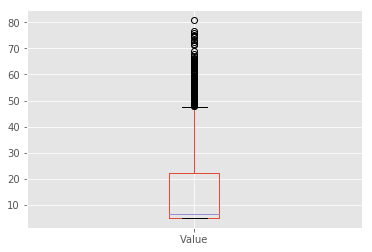

In [7]:
df['Value'].plot.box()
'''
data is skewed, most countries have low levels of undernourishment. 
'''

In [8]:
highest_undernourishment_percent = df.sort_values(by = 'Value', ascending = False)

In [9]:
highest_undernourishment_percent.groupby('Year').head(10)

,Country or Area,Year,Value,Value Footnotes
1823,Georgia,1992,80.8,24
1373,Djibouti,1992,76.8,24
1372,Djibouti,1993,75.9,23
1598,Ethiopia,1992,75.2,24
1599,Ethiopia,1991,74.8,25
1374,Djibouti,1991,74.8,25
1371,Djibouti,1994,74.3,22
1596,Ethiopia,1994,73.4,22
1597,Ethiopia,1993,72.5,23
1370,Djibouti,1995,71.5,21


'\naverage malnutrition rates have been dropping steadily over the last two decades\n'

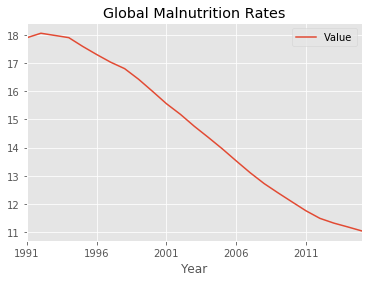

In [10]:
df.groupby('Year').mean().plot.line(title = "Global Malnutrition Rates")
'''
average malnutrition rates have been dropping steadily over the last two decades
'''

In [11]:
df['Country or Area'].unique().shape

(224,)

In [12]:
print df.nlargest(20, 'Value')
'''
some countries consistently have the highest level of malnutrition
early nineties had the highest rates of malnutrition 
political unrest
'''

     Country or Area  Year  Value Value Footnotes
1823         Georgia  1992   80.8              24
1373        Djibouti  1992   76.8              24
1372        Djibouti  1993   75.9              23
1598        Ethiopia  1992   75.2              24
1374        Djibouti  1991   74.8              25
1599        Ethiopia  1991   74.8              25
1371        Djibouti  1994   74.3              22
1596        Ethiopia  1994   73.4              22
1597        Ethiopia  1993   72.5              23
1370        Djibouti  1995   71.5              21
1595        Ethiopia  1995   71.4              21
1594        Ethiopia  1996   69.0              20
1369        Djibouti  1996   68.0              20
1822         Georgia  1993   67.1              23
4092          Rwanda  1998   66.4              18
4093          Rwanda  1997   65.8              19
1593        Ethiopia  1997   65.7              19
1821         Georgia  1994   65.0              22
1368        Djibouti  1997   64.9              19


'\nsome countries consistently have the highest level of malnutrition\nearly nineties had the highest rates of malnutrition \npolitical unrest\n'

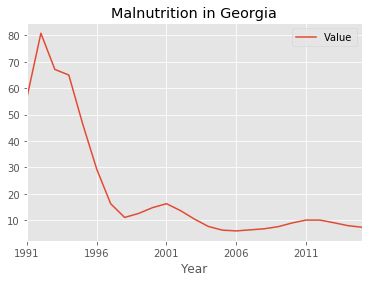

In [13]:
df.loc[df['Country or Area'] == 'Georgia'].sort_values\
(by = 'Year', ascending = True).set_index('Year').\
plot.line(title = "Malnutrition in Georgia")

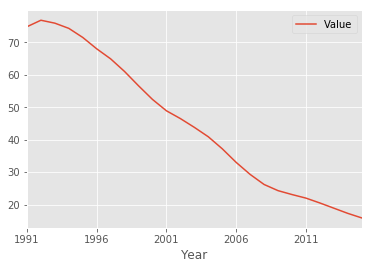

In [14]:
df.loc[df['Country or Area'] == 'Djibouti'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()

"\nrwanda's undernourishment rate was low and then went up after the 1994 genocide, before starting to lower again. \nwhat does this say about conflict and undernourishment?\n"

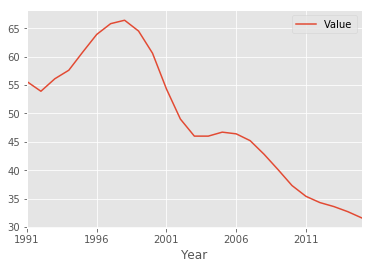

In [15]:
df.loc[df['Country or Area'] == 'Rwanda'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()
'''
rwanda's undernourishment rate was low and then went up after the 1994 genocide, before starting to lower again. 
what does this say about conflict and undernourishment?
'''

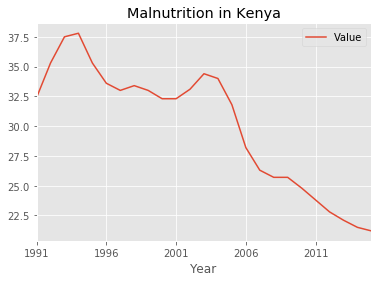

In [16]:
df.loc[df['Country or Area'] == 'Kenya'].sort_values\
(by = 'Year', ascending = True).set_index('Year').\
plot.line(title = 'Malnutrition in Kenya')

'\nUndernourishment has been going up in Iraq\nAlso noticed as I was charting this graph that data is missing for Somali, Libya, and Sudan.\nAdding to say that those countries are in the data set udner different names\nOne of the few countries where undernourishment has gone up \n'

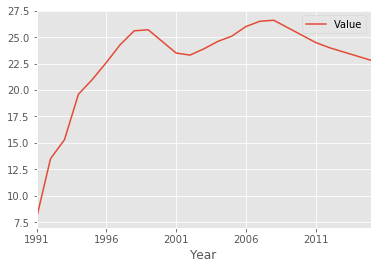

In [17]:
df.loc[df['Country or Area'] == 'Iraq'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()
'''
Undernourishment has been going up in Iraq
Also noticed as I was charting this graph that data is missing for Somali, Libya, and Sudan.
Adding to say that those countries are in the data set udner different names
One of the few countries where undernourishment has gone up 
'''

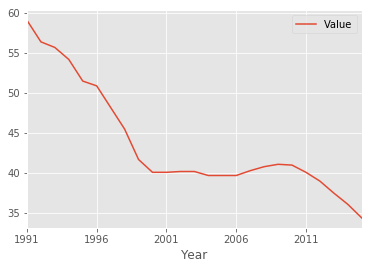

In [18]:
df.loc[df['Country or Area'] == 'Chad'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()


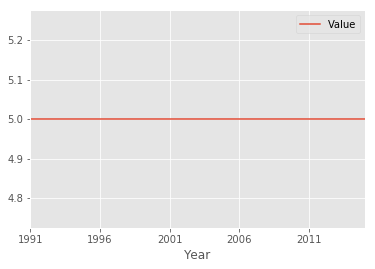

In [19]:
df.loc[df['Country or Area'] == 'Turkey'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()


'\neven more convinced that the 5% is also missing data of some sort\n'

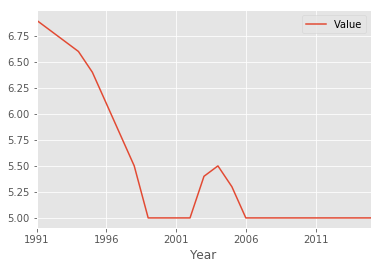

In [20]:
df.loc[df['Country or Area'] == 'Mexico'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()
'''
even more convinced that the 5% is also missing data of some sort
'''

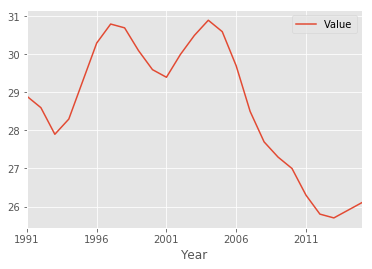

In [21]:
df.loc[df['Country or Area'] == 'Yemen'].sort_values(by = 'Year', ascending = True).set_index('Year').plot.line()


In [22]:
mean_undernourishment = df.groupby('Country or Area').mean()

In [23]:
mean_undernourishment.describe()

,Value
count,171.000000
mean,14.736846
std,12.482396
min,5.000000
25%,5.000000
50%,8.352000
75%,22.570000
max,56.400000


'\nIs most of the data just 5% undernourishment? Is that a default value? \n'

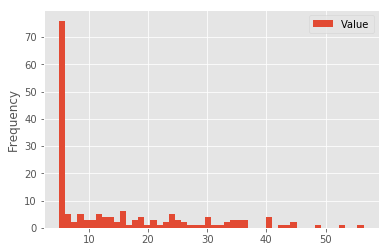

In [24]:
mean_undernourishment.plot.hist(bins = 50)
'''
Is most of the data just 5% undernourishment? Is that a default value? 
'''

In [25]:
mean_undernourishment.head()

,Value
Country or Area,
Afghanistan,35.812
Albania,5.000
Algeria,6.984
American Samoa,NaN
Andorra,5.000


In [26]:
df = mean_undernourishment.reset_index()

In [27]:
df.sort_values(by = 'Value', inplace = True, ascending = True)


In [28]:
print df.nlargest(20, 'Value')
'''
Countries with the highest percentage of malnutrition
'''

                            Country or Area   Value
85                                    Haiti  56.400
63                                 Ethiopia  52.324
163                                  Rwanda  49.064
54                                 Djibouti  44.960
222                                  Zambia  44.392
39                                     Chad  43.728
38                 Central African Republic  42.960
133                              Mozambique  40.860
134                                 Myanmar  40.616
5                                    Angola  40.592
223                                Zimbabwe  40.584
194                              Tajikistan  36.204
102  Korea, Democratic People's Republic of  36.116
110                                 Liberia  35.884
0                               Afghanistan  35.812
197                             Timor-Leste  35.736
44                                    Congo  35.416
129                                Mongolia  34.712
176         

'\nCountries with the highest percentage of malnutrition\n'

In [29]:
print mean_undernourishment[mean_undernourishment['Value'] == 5].count()
print mean_undernourishment[mean_undernourishment['Value'] == 5].count()/mean_undernourishment.count() * 100
'''
there are 64 countries for which the mean undernourishment for the last fifteen years is 5%. this isn't really a 
missing data problem, because developed countries probably have the best data collection. i'm just baffled at the
idea of imposing a maximum minimum undernourishment percentage

37% of this countries are at 5% 
'''

Value    64
dtype: int64
Value    37.426901
dtype: float64


"\nthere are 64 countries for which the mean undernourishment for the last fifteen years is 5%. this isn't really a \nmissing data problem, because developed countries probably have the best data collection. i'm just baffled at the\nidea of imposing a maximum minimum undernourishment percentage\n\n37% of this countries are at 5% \n"